<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
cell_phones.head(1)

,geo,time,cell_phones_total
0,abw,1960,0.0


In [3]:
population.head(1)

,geo,time,population_total
0,afg,1800,3280000


In [4]:
geo_country_codes
geo_country_codes.head(1)

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [5]:
cell_pop = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
cell_pop.head(1)

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351


In [6]:
cell_pop.head(1)
cell_pop.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [7]:
geo_country=geo_country_codes[['geo','country']]
geo_country.head(1)

,geo,country
0,abkh,Abkhazia


In [8]:
geo_country.shape

(273, 2)

In [9]:
c_c_p = pd.merge(geo_country,cell_pop, how='inner', on=['geo'] )
c_c_p.head(1)

,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996351


In [10]:
c_c_p.shape

(8590, 5)

### Part 2. Make features

In [11]:
c_c_p.dtypes

geo                   object
country               object
time                   int64
cell_phones_total    float64
population_total       int64
dtype: object

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [12]:
import pandas as pd
import numpy as np

c_c_p.dtypes

geo                   object
country               object
time                   int64
cell_phones_total    float64
population_total       int64
dtype: object

In [13]:
import pandas as pd
import numpy as np
c_c_p['population_total'].astype('float')
c_c_p['cell_phones_per_person'] = c_c_p['cell_phones_total'] / c_c_p['population_total']
c_c_p.dtypes

geo                        object
country                    object
time                        int64
cell_phones_total         float64
population_total            int64
cell_phones_per_person    float64
dtype: object

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
0,afg,Afghanistan,1960,0.0,8996351,0.0


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [112]:
import pandas as pd
#c_c_p['geo'] = c_c_p['geo'].map(lambda name: name.upper())
#c_c_p['geo'].str.upper()
#c_c_p['geo'].astype('string')
c_c_p['geo'].astype(str)
c_c_p.dtypes

geo                        object
country                    object
time                        int64
cell_phones_total         float64
population_total            int64
cell_phones_per_person    float64
dtype: object

In [113]:
c_c_p['geo'] = c_c_p['geo'].str.upper() 
  
c_c_p.head(4) 

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
0,AFG,Afghanistan,1960,0.0,8996351,0.0
1,AFG,Afghanistan,1965,0.0,9938414,0.0
2,AFG,Afghanistan,1970,0.0,11126123,0.0
3,AFG,Afghanistan,1975,0.0,12590286,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [19]:
c_c_p.describe()

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [33]:
ccp = c_c_p.groupby('country').max()[['cell_phones_total']]
ccp.head()

,cell_phones_total
country,
Afghanistan,"23,929,713.0"
Albania,"3,685,983.0"
Algeria,"49,873,389.0"
Andorra,"80,337.0"
Angola,"14,052,558.0"


In [43]:
ccp= c_c_p.sort_values(by='cell_phones_total', ascending=False)
# import plotly.express as px
# gapminder = px.data.gapminder()
# ccp = gapminder.sort_values('cell_phones_total',ascending=False)
ccp.head(5)

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1496,CHN,China,2017,"1,474,097,000.0",1409517397,1.0458168186766978
1495,CHN,China,2016,"1,364,934,000.0",1403500365,0.9725213003418065
1494,CHN,China,2015,"1,291,984,200.0",1397028553,0.9248087286588194
1493,CHN,China,2014,"1,286,093,000.0",1390110388,0.9251732891877361
1492,CHN,China,2013,"1,229,113,000.0",1382793212,0.8888624772913624


In [0]:
c_c_p \
  .sort_values(['geo'], ascending = False) \
  .groupby('geo') \
  .first() \
  .reset_index()

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?  


  - 1990

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [53]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [117]:
df['show'].astype(int)

KeyError: ignored

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [78]:
nine = df.loc[df['Year'] == 1999]
nine.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [64]:
pd.crosstab(nine,[Year,Guest,Occupation])

SyntaxError: ignored

In [96]:
niner= nine.sort_values(by='Guest', ascending=False)
niner.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
27,1999,actress,11/17/99,Acting,Yasmine Bleeth,"Acting, Comedy & Music"
10,1999,actress,1/27/99,Acting,Yasmine Bleeth,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
132,1999,actress,7/27/99,Acting,Wendie Malick,"Acting, Comedy & Music"
133,1999,Vocalist,7/28/99,Musician,Vince Neil,"Acting, Comedy & Music"


In [97]:
niner.dtypes

Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
dtype: object

In [0]:
#df.groupby(['Guest']).size()

In [123]:
 count=niner.groupby(['Guest']).size() 
 count.head()    #.reset_index(name='counts')

Guest
(None)           1
(no guest)       1
Aaron Brown      1
Aaron Eckhart    1
Aaron Sorkin     1
dtype: int64

### Part 2 — Recreate this explanatory visualization:

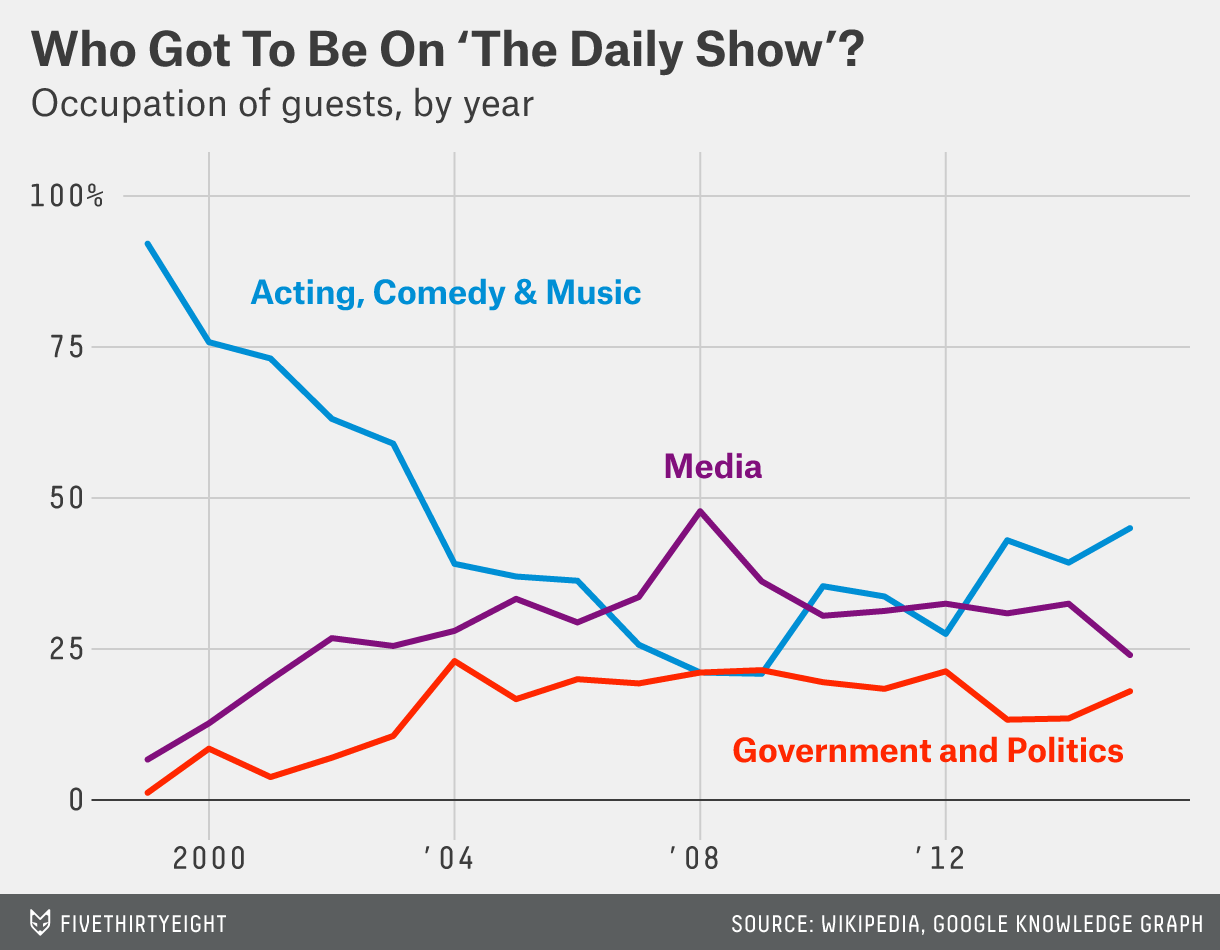

AttributeError: ignored

In [92]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

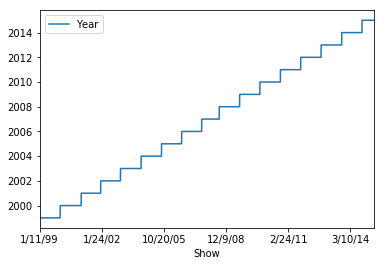

In [110]:
df.plot(x="Show", y=["Year", "Occupation"], kind="line");

In [111]:
df.dtypes

Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
dtype: object

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [83]:
df.head()


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [107]:
niner=pd.crosstab(df.Guest, df.Year, normalize='index')
#pd.crosstab(df.x, df.y, normalize='index')
niner.head()

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Guest,,,,,,,,,,,,,,,,,
(None),0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(no guest),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Brown,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Eckhart,0.0,0.0,0.0,0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.3333333333333333,0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.0
Aaron Sorkin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
niner.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
27,1999,actress,11/17/99,Acting,Yasmine Bleeth,"Acting, Comedy & Music"
10,1999,actress,1/27/99,Acting,Yasmine Bleeth,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
132,1999,actress,7/27/99,Acting,Wendie Malick,"Acting, Comedy & Music"
133,1999,Vocalist,7/28/99,Musician,Vince Neil,"Acting, Comedy & Music"


In [106]:
df.plot(x="show", y=["year", "Occupation"], kind="line");

KeyError: ignored

In [0]:
g=df.plot(x = 'Year', y = 'show',figsize=(12,8))

In [0]:
under_20_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8))
print('Type:', type(under_20_graph))